In [1]:
#Import important Commands
import numpy as np
import pandas as pd
#ACLED Key:- PB0IIdIubDfyfboiE!yz
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [4]:
from google.colab import drive
drive.mount('/content/drive')
df= pd.read_excel("/content/drive/MyDrive/civilians_Mar10.xlsx")

Mounted at /content/drive


In [5]:
df

,ISO,EVENT_ID_CNTY,EVENT_ID_NO_CNTY,EVENT_DATE,YEAR,TIME_PRECISION,EVENT_TYPE,SUB_EVENT_TYPE,ACTOR1,ASSOC_ACTOR_1,...,ADMIN3,LOCATION,LATITUDE,LONGITUDE,GEO_PRECISION,SOURCE,SOURCE_SCALE,NOTES,FATALITIES,TIMESTAMP
0,0,XKX8,8,2018-01-16,2018,1,Violence against civilians,Attack,Unidentified Armed Group (Kosovo),NaN,...,NaN,North Mitrovica,42.895,20.865,1,Intellinews,International,"On the morning of January 16, prominent Kosova...",1,1658253394
1,0,XKX16,16,2018-03-03,2018,1,Protests,Excessive force against protesters,Police Forces of Kosovo (2017-2020),NaN,...,NaN,Mitrovica,42.887,20.867,1,UNMIK,National,"On 3 March 2018, 2018 in Mitrovica, police use...",0,1652375201
2,0,XKX17,17,2018-03-05,2018,1,Violence against civilians,Attack,Unidentified Armed Group (Kosovo),Serbian Ethnic Group (Kosovo),...,NaN,North Mitrovica,42.895,20.865,1,UNMIK,National,"On 5 March 2018, 2018 in North Mitrovica, Koso...",0,1652375201
3,0,XKX23,23,2018-03-20,2018,1,Violence against civilians,Attack,Unidentified Armed Group (Kosovo),Albanian Ethnic Group (Kosovo),...,NaN,Donji Dragoljevac,42.761,20.490,1,KoSSev,National,"On 20 March 2018, 2018 in Dragoljevac, Kosovo,...",0,1652375201
4,0,XKX24,24,2018-03-21,2018,1,Violence against civilians,Attack,LV: Self-Determination,NaN,...,NaN,Pristina,42.667,21.172,1,AFP,International,"On 21 March 2018, 2018 in Pristina, Kosovo, te...",0,1652375201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276608,894,ZAM1552,1552,2023-01-16,2023,1,Riots,Mob violence,Rioters (Zambia),UPND: United Party for National Development,...,NaN,Kasama,-10.217,31.217,1,Daily Nation (Zambia),National,"On 16 January 2023, UPND supporters assaulted ...",0,1675698503
276609,894,ZAM1551,1551,2023-01-17,2023,2,Riots,Mob violence,Rioters (Zambia),Vigilante Group (Zambia),...,NaN,Kawambwa,-9.800,29.133,1,Mwebantu,National,"Around 17 January 2023 (as reported), a mob be...",0,1674487331
276610,894,ZAM1555,1555,2023-01-20,2023,1,Violence against civilians,Attack,Private Security Forces (Zambia),NaN,...,NaN,Kafue,-15.769,28.181,1,Mwebantu,National,"On 20 January 2023, two security guards assaul...",1,1675698503
276611,894,ZAM1554,1554,2023-01-29,2023,1,Riots,Mob violence,Rioters (Zambia),Vigilante Group (Zambia),...,NaN,Kabwe,-14.447,28.446,2,Mwebantu,National,"On 29 January 2023, a mob assaulted three men ...",0,1675698503


In [6]:
df.columns = df.columns.str.lower()

In [7]:
df.fillna(0) 

,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,assoc_actor_1,...,admin3,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp
0,0,XKX8,8,2018-01-16,2018,1,Violence against civilians,Attack,Unidentified Armed Group (Kosovo),0,...,0,North Mitrovica,42.895,20.865,1,Intellinews,International,"On the morning of January 16, prominent Kosova...",1,1658253394
1,0,XKX16,16,2018-03-03,2018,1,Protests,Excessive force against protesters,Police Forces of Kosovo (2017-2020),0,...,0,Mitrovica,42.887,20.867,1,UNMIK,National,"On 3 March 2018, 2018 in Mitrovica, police use...",0,1652375201
2,0,XKX17,17,2018-03-05,2018,1,Violence against civilians,Attack,Unidentified Armed Group (Kosovo),Serbian Ethnic Group (Kosovo),...,0,North Mitrovica,42.895,20.865,1,UNMIK,National,"On 5 March 2018, 2018 in North Mitrovica, Koso...",0,1652375201
3,0,XKX23,23,2018-03-20,2018,1,Violence against civilians,Attack,Unidentified Armed Group (Kosovo),Albanian Ethnic Group (Kosovo),...,0,Donji Dragoljevac,42.761,20.490,1,KoSSev,National,"On 20 March 2018, 2018 in Dragoljevac, Kosovo,...",0,1652375201
4,0,XKX24,24,2018-03-21,2018,1,Violence against civilians,Attack,LV: Self-Determination,0,...,0,Pristina,42.667,21.172,1,AFP,International,"On 21 March 2018, 2018 in Pristina, Kosovo, te...",0,1652375201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276608,894,ZAM1552,1552,2023-01-16,2023,1,Riots,Mob violence,Rioters (Zambia),UPND: United Party for National Development,...,0,Kasama,-10.217,31.217,1,Daily Nation (Zambia),National,"On 16 January 2023, UPND supporters assaulted ...",0,1675698503
276609,894,ZAM1551,1551,2023-01-17,2023,2,Riots,Mob violence,Rioters (Zambia),Vigilante Group (Zambia),...,0,Kawambwa,-9.800,29.133,1,Mwebantu,National,"Around 17 January 2023 (as reported), a mob be...",0,1674487331
276610,894,ZAM1555,1555,2023-01-20,2023,1,Violence against civilians,Attack,Private Security Forces (Zambia),0,...,0,Kafue,-15.769,28.181,1,Mwebantu,National,"On 20 January 2023, two security guards assaul...",1,1675698503
276611,894,ZAM1554,1554,2023-01-29,2023,1,Riots,Mob violence,Rioters (Zambia),Vigilante Group (Zambia),...,0,Kabwe,-14.447,28.446,2,Mwebantu,National,"On 29 January 2023, a mob assaulted three men ...",0,1675698503


# Taking Regions of ASIA and AFRICA 


In [8]:
# Define a list of valid regions
valid_regions = ['Caucasus and Central Asia', 'Northern Africa',
       'Middle Africa', 'Middle East', 'South Asia', 'Southern Africa',
       'Southeast Asia', 'Eastern Africa', 'Western Africa', 'East Asia']

# Drop rows where "Region" is not in the list of valid regions df
df = df[df['region'].isin(valid_regions)]

In [9]:
df

,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,assoc_actor_1,...,admin3,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp
76,4,AFG20,20,2017-01-01,2017,1,Explosions/Remote violence,Remote explosive/landmine/IED,Unidentified Armed Group (Afghanistan),NaN,...,NaN,Herat,34.348,62.200,1,Herat TV; Aina TV; TOLO News; Khaama Press; Af...,Subnational-National,"Jan 1, 2017: A bomb in a Shi'a mosque in Bagh ...",1,1618518785
77,4,AFG24,24,2017-01-01,2017,2,Violence against civilians,Attack,Taliban,NaN,...,NaN,Nawa-i-Barikzayi,31.392,64.319,2,Khaama Press; Pajhwok Afghan News,National,Reported 5 Jan 2017: Taliban killed a female p...,1,1638981227
78,4,AFG29043,29043,2017-01-01,2017,1,Violence against civilians,Attack,Taliban,NaN,...,NaN,Khak-i-Safed,32.654,62.104,2,Voice of Jihad,Other,1 Jan 2017: Two men held by the Taliban after ...,0,1649188060
79,4,AFG71,71,2017-01-02,2017,1,Explosions/Remote violence,Remote explosive/landmine/IED,Unidentified Armed Group (Afghanistan),NaN,...,NaN,Nijrab,34.979,69.572,2,TOLO News; Pajhwok Afghan News,National,2 Jan 2017: Former jihadi and commander of Hez...,2,1580847061
80,4,AFG29067,29067,2017-01-02,2017,1,Violence against civilians,Attack,Taliban,NaN,...,NaN,Ghazni,33.551,68.422,1,Voice of Jihad,Other,2 Jan 2017: 6 civilians accused of robbery and...,0,1580847062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276608,894,ZAM1552,1552,2023-01-16,2023,1,Riots,Mob violence,Rioters (Zambia),UPND: United Party for National Development,...,NaN,Kasama,-10.217,31.217,1,Daily Nation (Zambia),National,"On 16 January 2023, UPND supporters assaulted ...",0,1675698503
276609,894,ZAM1551,1551,2023-01-17,2023,2,Riots,Mob violence,Rioters (Zambia),Vigilante Group (Zambia),...,NaN,Kawambwa,-9.800,29.133,1,Mwebantu,National,"Around 17 January 2023 (as reported), a mob be...",0,1674487331
276610,894,ZAM1555,1555,2023-01-20,2023,1,Violence against civilians,Attack,Private Security Forces (Zambia),NaN,...,NaN,Kafue,-15.769,28.181,1,Mwebantu,National,"On 20 January 2023, two security guards assaul...",1,1675698503
276611,894,ZAM1554,1554,2023-01-29,2023,1,Riots,Mob violence,Rioters (Zambia),Vigilante Group (Zambia),...,NaN,Kabwe,-14.447,28.446,2,Mwebantu,National,"On 29 January 2023, a mob assaulted three men ...",0,1675698503


In [10]:
df0= df.query('fatalities == 0')
df0

,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,assoc_actor_1,...,admin3,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp
78,4,AFG29043,29043,2017-01-01,2017,1,Violence against civilians,Attack,Taliban,NaN,...,NaN,Khak-i-Safed,32.654,62.104,2,Voice of Jihad,Other,1 Jan 2017: Two men held by the Taliban after ...,0,1649188060
80,4,AFG29067,29067,2017-01-02,2017,1,Violence against civilians,Attack,Taliban,NaN,...,NaN,Ghazni,33.551,68.422,1,Voice of Jihad,Other,2 Jan 2017: 6 civilians accused of robbery and...,0,1580847062
81,4,AFG80,80,2017-01-02,2017,1,Violence against civilians,Abduction/forced disappearance,Taliban,NaN,...,NaN,Takhta Pul,31.321,65.961,2,Pajhwok Afghan News; News Yemen,National-International,"On 2 January 2017, 10 laborers were abducted b...",0,1618524512
83,4,AFG100,100,2017-01-03,2017,2,Violence against civilians,Attack,Unidentified Armed Group (Afghanistan),NaN,...,NaN,Kandahar,31.613,65.710,1,Pajhwok Afghan News,National,Reported on 3 Jan 2017: A bakers' representati...,0,1607974416
84,4,AFG98,98,2017-01-03,2017,1,Violence against civilians,Attack,Unidentified Armed Group (Afghanistan),Government of Afghanistan (2014-2021),...,NaN,Kabul,34.517,69.183,1,Pajhwok Afghan News,National,"On 3 January 2017, men of MP akbar Stanikzai a...",0,1631067199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276605,894,ZAM1548,1548,2022-12-31,2022,1,Riots,Mob violence,Rioters (Zambia),UPND: United Party for National Development,...,NaN,Chingola,-12.529,27.884,1,Lusaka Times; Mwebantu,National,"On 31 December 2022, UPND supporters stormed a...",0,1673893295
276608,894,ZAM1552,1552,2023-01-16,2023,1,Riots,Mob violence,Rioters (Zambia),UPND: United Party for National Development,...,NaN,Kasama,-10.217,31.217,1,Daily Nation (Zambia),National,"On 16 January 2023, UPND supporters assaulted ...",0,1675698503
276609,894,ZAM1551,1551,2023-01-17,2023,2,Riots,Mob violence,Rioters (Zambia),Vigilante Group (Zambia),...,NaN,Kawambwa,-9.800,29.133,1,Mwebantu,National,"Around 17 January 2023 (as reported), a mob be...",0,1674487331
276611,894,ZAM1554,1554,2023-01-29,2023,1,Riots,Mob violence,Rioters (Zambia),Vigilante Group (Zambia),...,NaN,Kabwe,-14.447,28.446,2,Mwebantu,National,"On 29 January 2023, a mob assaulted three men ...",0,1675698503


In [11]:
# Filter data where year > 2000
df1 = df[df['year'] > 2000]

In [12]:
df1

,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,assoc_actor_1,...,admin3,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp
76,4,AFG20,20,2017-01-01,2017,1,Explosions/Remote violence,Remote explosive/landmine/IED,Unidentified Armed Group (Afghanistan),NaN,...,NaN,Herat,34.348,62.200,1,Herat TV; Aina TV; TOLO News; Khaama Press; Af...,Subnational-National,"Jan 1, 2017: A bomb in a Shi'a mosque in Bagh ...",1,1618518785
77,4,AFG24,24,2017-01-01,2017,2,Violence against civilians,Attack,Taliban,NaN,...,NaN,Nawa-i-Barikzayi,31.392,64.319,2,Khaama Press; Pajhwok Afghan News,National,Reported 5 Jan 2017: Taliban killed a female p...,1,1638981227
78,4,AFG29043,29043,2017-01-01,2017,1,Violence against civilians,Attack,Taliban,NaN,...,NaN,Khak-i-Safed,32.654,62.104,2,Voice of Jihad,Other,1 Jan 2017: Two men held by the Taliban after ...,0,1649188060
79,4,AFG71,71,2017-01-02,2017,1,Explosions/Remote violence,Remote explosive/landmine/IED,Unidentified Armed Group (Afghanistan),NaN,...,NaN,Nijrab,34.979,69.572,2,TOLO News; Pajhwok Afghan News,National,2 Jan 2017: Former jihadi and commander of Hez...,2,1580847061
80,4,AFG29067,29067,2017-01-02,2017,1,Violence against civilians,Attack,Taliban,NaN,...,NaN,Ghazni,33.551,68.422,1,Voice of Jihad,Other,2 Jan 2017: 6 civilians accused of robbery and...,0,1580847062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276608,894,ZAM1552,1552,2023-01-16,2023,1,Riots,Mob violence,Rioters (Zambia),UPND: United Party for National Development,...,NaN,Kasama,-10.217,31.217,1,Daily Nation (Zambia),National,"On 16 January 2023, UPND supporters assaulted ...",0,1675698503
276609,894,ZAM1551,1551,2023-01-17,2023,2,Riots,Mob violence,Rioters (Zambia),Vigilante Group (Zambia),...,NaN,Kawambwa,-9.800,29.133,1,Mwebantu,National,"Around 17 January 2023 (as reported), a mob be...",0,1674487331
276610,894,ZAM1555,1555,2023-01-20,2023,1,Violence against civilians,Attack,Private Security Forces (Zambia),NaN,...,NaN,Kafue,-15.769,28.181,1,Mwebantu,National,"On 20 January 2023, two security guards assaul...",1,1675698503
276611,894,ZAM1554,1554,2023-01-29,2023,1,Riots,Mob violence,Rioters (Zambia),Vigilante Group (Zambia),...,NaN,Kabwe,-14.447,28.446,2,Mwebantu,National,"On 29 January 2023, a mob assaulted three men ...",0,1675698503


In [27]:
import pandas as pd
import requests
from concurrent.futures import ThreadPoolExecutor
import functools
import multiprocessing
# Create a cache to store elevation data
elevation_cache = {}

# Function to get terrain type based on elevation
def get_terrain_type(elevation):
    if elevation is None:
        return 'Unknown'
    elif elevation > 2000:
        return 'Mountain'
    elif elevation > 500:
        return 'Hill'
    elif elevation > 100:
        return 'Forest'
    else:
        return 'Plain'

# Function to get elevation from latitude and longitude using Mapbox Elevation API
def get_elevation(latitude, longitude, cache):
    if (latitude, longitude) in cache:
        # If data is available in cache, return it
        return cache[(latitude, longitude)]
    else:
        # Fetch elevation data from API
        url = f'https://api.mapbox.com/v4/mapbox.mapbox-terrain-v2/tilequery/{longitude},{latitude}.json?layers=contour&limit=1&access_token=pk.eyJ1Ijoidml2ZWs5MTExIiwiYSI6ImNsZ3kyOGFwbzA1ZDMzcW05ZW53dnJnbWwifQ.2-bsr1wWP4F63UOk7u3Gkw'
        response = requests.get(url)
        data = response.json()
        print(data)
        features = data.get('features', [])
        if len(features) > 0:
            elevation = features[0]['properties']['ele']
            cache[(latitude, longitude)] = elevation
            return elevation
        else:
            return None

# Define batch processing function to process a batch of rows in parallel
def process_batch(rows, cache):
    results = []
    for index, row in rows.iterrows():
        elevation = get_elevation(row['latitude'], row['longitude'], elevation_cache)
        terrain_type = get_terrain_type(elevation)
        results.append((index, elevation, terrain_type))
    return results

# Use ThreadPoolExecutor to process the DataFrame in parallel
# Set the maximum number of threads to the number of CPU cores for optimal performance
max_threads = multiprocessing.cpu_count()
with ThreadPoolExecutor(max_workers=max_threads) as executor:
    # Split the DataFrame into batches to process in parallel
    batch_size = 1000
    batches = [df1[i:i+batch_size] for i in range(0, len(df1), batch_size)]
    
    # Process each batch in parallel
    results = list(executor.map(functools.partial(process_batch, cache=elevation_cache), batches))
    
    # Flatten the list of results
    # Flatten the list of results
    results = [item for sublist in results for item in sublist]

# Create a new DataFrame from the results
result_df = pd.DataFrame(results, columns=['index', 'elevation', 'terrain_type'])

# Merge
# Merge result_df with df on the index column
df1 = df1.merge(result_df, left_index=True, right_on='index')

# Drop the unnecessary index columns
df1.drop(columns=['index'], inplace=True)

# Print the updated DataFrame
print(df1)


In [14]:
# saving the excel
df1.to_csv('acled_terrain0.csv', index=False)

In [ ]:
df1

In [15]:
df1['terrain_type'].unique()

array(['Hill', 'Mountain', 'Forest', 'Plain', 'Unknown'], dtype=object)

In [2]:
#Import important Commands
import numpy as np
import pandas as pd
#ACLED Key:- PB0IIdIubDfyfboiE!yz
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [3]:
from google.colab import drive
drive.mount('/content/drive')
data= pd.read_csv("/content/drive/MyDrive/acled_terrain0.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data.head()

,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,assoc_actor_1,...,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,elevation,terrain_type
0,4,AFG20,20,2017-01-01,2017,1,Explosions/Remote violence,Remote explosive/landmine/IED,Unidentified Armed Group (Afghanistan),NaN,...,34.348,62.200,1,Herat TV; Aina TV; TOLO News; Khaama Press; Af...,Subnational-National,"Jan 1, 2017: A bomb in a Shi'a mosque in Bagh ...",1,1618518785,910.0,Hill
1,4,AFG24,24,2017-01-01,2017,2,Violence against civilians,Attack,Taliban,NaN,...,31.392,64.319,2,Khaama Press; Pajhwok Afghan News,National,Reported 5 Jan 2017: Taliban killed a female p...,1,1638981227,740.0,Hill
2,4,AFG29043,29043,2017-01-01,2017,1,Violence against civilians,Attack,Taliban,NaN,...,32.654,62.104,2,Voice of Jihad,Other,1 Jan 2017: Two men held by the Taliban after ...,0,1649188060,670.0,Hill
3,4,AFG71,71,2017-01-02,2017,1,Explosions/Remote violence,Remote explosive/landmine/IED,Unidentified Armed Group (Afghanistan),NaN,...,34.979,69.572,2,TOLO News; Pajhwok Afghan News,National,2 Jan 2017: Former jihadi and commander of Hez...,2,1580847061,1550.0,Hill
4,4,AFG29067,29067,2017-01-02,2017,1,Violence against civilians,Attack,Taliban,NaN,...,33.551,68.422,1,Voice of Jihad,Other,2 Jan 2017: 6 civilians accused of robbery and...,0,1580847062,2170.0,Mountain


In [5]:
# Drop the rows where terrain type is unknown
data = data[data['terrain_type'] != 'Unknown']

In [6]:
# Drop the rows where year is 2023
data = data[data['year'] <= 2022]

In [7]:
print(data['terrain_type'].value_counts())

Hill        63798
Forest      56724
Plain       55047
Mountain     3282
Name: terrain_type, dtype: int64


In [34]:
# Get the range of elevation for rows where terrain type is "Plain"
plain_elevation_range = data[data['terrain_type'] == 'Plain']['elevation'].agg(['min', 'max'])

# Display the range of elevation for "Plain" terrain type
#print("\nRange of Elevation for 'Plain' Terrain:")
print(plain_elevation_range)

min   -500.0
max    100.0
Name: elevation, dtype: float64


In [7]:
data['actor1'].value_counts().count()

4837

In [35]:
data['event_type'].value_counts()

Violence against civilians    119068
Explosions/Remote violence     38467
Riots                          17222
Protests                        4094
Name: event_type, dtype: int64

In [36]:
data.columns

Index(['iso', 'event_id_cnty', 'event_id_no_cnty', 'event_date', 'year',
       'time_precision', 'event_type', 'sub_event_type', 'actor1',
       'assoc_actor_1', 'inter1', 'actor2', 'assoc_actor_2', 'inter2',
       'interaction', 'region', 'country', 'admin1', 'admin2', 'admin3',
       'location', 'latitude', 'longitude', 'geo_precision', 'source',
       'source_scale', 'notes', 'fatalities', 'timestamp', 'elevation',
       'terrain_type'],
      dtype='object')

In [37]:
data['region'].unique()

array(['Caucasus and Central Asia', 'Northern Africa', 'Middle Africa',
       'Middle East', 'South Asia', 'Southern Africa', 'Southeast Asia',
       'Eastern Africa', 'Western Africa', 'East Asia'], dtype=object)

In [8]:
# Define a mapping of regions to continents
continent_map = {'Caucasus and Central Asia': 'Asia', 
                 'Northern Africa': 'Africa', 
                 'Middle Africa': 'Africa', 
                 'Middle East': 'Asia', 
                 'South Asia': 'Asia', 
                 'Southern Africa': 'Africa', 
                 'Southeast Asia': 'Asia', 
                 'Eastern Africa': 'Africa', 
                 'East Asia': 'Asia', 
                 'Western Africa': 'Africa'}

# Create the "continent" column based on the mapping
data['continent'] = data['region'].map(continent_map)


In [39]:
data

,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,assoc_actor_1,...,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,elevation,terrain_type,continent
0,4,AFG20,20,2017-01-01,2017,1,Explosions/Remote violence,Remote explosive/landmine/IED,Unidentified Armed Group (Afghanistan),NaN,...,62.200,1,Herat TV; Aina TV; TOLO News; Khaama Press; Af...,Subnational-National,"Jan 1, 2017: A bomb in a Shi'a mosque in Bagh ...",1,1618518785,910.0,Hill,Asia
1,4,AFG24,24,2017-01-01,2017,2,Violence against civilians,Attack,Taliban,NaN,...,64.319,2,Khaama Press; Pajhwok Afghan News,National,Reported 5 Jan 2017: Taliban killed a female p...,1,1638981227,740.0,Hill,Asia
2,4,AFG29043,29043,2017-01-01,2017,1,Violence against civilians,Attack,Taliban,NaN,...,62.104,2,Voice of Jihad,Other,1 Jan 2017: Two men held by the Taliban after ...,0,1649188060,670.0,Hill,Asia
3,4,AFG71,71,2017-01-02,2017,1,Explosions/Remote violence,Remote explosive/landmine/IED,Unidentified Armed Group (Afghanistan),NaN,...,69.572,2,TOLO News; Pajhwok Afghan News,National,2 Jan 2017: Former jihadi and commander of Hez...,2,1580847061,1550.0,Hill,Asia
4,4,AFG29067,29067,2017-01-02,2017,1,Violence against civilians,Attack,Taliban,NaN,...,68.422,1,Voice of Jihad,Other,2 Jan 2017: 6 civilians accused of robbery and...,0,1580847062,2170.0,Mountain,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192273,894,ZAM1537,1537,2022-11-04,2022,1,Riots,Mob violence,Rioters (Zambia),UPND: United Party for National Development,...,31.325,1,Zambia Reports,National,"On 4 November 2022, UPND supporters assaulted ...",0,1667850819,950.0,Hill,Africa
192274,894,ZAM1541,1541,2022-11-14,2022,1,Violence against civilians,Attack,Police Forces of Zambia (2021-),NaN,...,28.283,1,Lusaka Times; Mwebantu,Subnational-National,"On 14 November 2022, police detained and assau...",0,1669661987,1250.0,Hill,Africa
192275,894,ZAM1542,1542,2022-11-17,2022,1,Riots,Mob violence,Rioters (Zambia),Vigilante Group (Zambia),...,24.367,2,Lusaka Times; Mwebantu,National,"On 17 November 2022, a mob assaulted, axed, an...",1,1673893295,1360.0,Hill,Africa
192276,894,ZAM1545,1545,2022-12-28,2022,1,Riots,Mob violence,Rioters (Zambia),Vigilante Group (Zambia),...,27.317,2,Zambia Reports,National,"On 28 December 2022, a mob assaulted and kille...",1,1673291090,1130.0,Hill,Africa


In [9]:
num_fatalities = 0
num_rows = data[data['fatalities'] > num_fatalities].shape[0]
print(f"Number of rows with fatalities greater than {num_fatalities}: {num_rows}")


Number of rows with fatalities greater than 0: 92343


In [10]:
# Convert 'fatalities' column into a binary outcome variable
data['conflict'] = data['fatalities'].apply(lambda x: 1 if x > 0 else 0)

# Print the count of rows for each class
print(data['conflict'].value_counts())

1    92343
0    86508
Name: conflict, dtype: int64


In [42]:
data.head()

,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,assoc_actor_1,...,geo_precision,source,source_scale,notes,fatalities,timestamp,elevation,terrain_type,continent,conflict
0,4,AFG20,20,2017-01-01,2017,1,Explosions/Remote violence,Remote explosive/landmine/IED,Unidentified Armed Group (Afghanistan),NaN,...,1,Herat TV; Aina TV; TOLO News; Khaama Press; Af...,Subnational-National,"Jan 1, 2017: A bomb in a Shi'a mosque in Bagh ...",1,1618518785,910.0,Hill,Asia,1
1,4,AFG24,24,2017-01-01,2017,2,Violence against civilians,Attack,Taliban,NaN,...,2,Khaama Press; Pajhwok Afghan News,National,Reported 5 Jan 2017: Taliban killed a female p...,1,1638981227,740.0,Hill,Asia,1
2,4,AFG29043,29043,2017-01-01,2017,1,Violence against civilians,Attack,Taliban,NaN,...,2,Voice of Jihad,Other,1 Jan 2017: Two men held by the Taliban after ...,0,1649188060,670.0,Hill,Asia,0
3,4,AFG71,71,2017-01-02,2017,1,Explosions/Remote violence,Remote explosive/landmine/IED,Unidentified Armed Group (Afghanistan),NaN,...,2,TOLO News; Pajhwok Afghan News,National,2 Jan 2017: Former jihadi and commander of Hez...,2,1580847061,1550.0,Hill,Asia,1
4,4,AFG29067,29067,2017-01-02,2017,1,Violence against civilians,Attack,Taliban,NaN,...,1,Voice of Jihad,Other,2 Jan 2017: 6 civilians accused of robbery and...,0,1580847062,2170.0,Mountain,Asia,0


In [11]:
# Create dummy variables for event_type, terrain_type, and continent columns
data1 = pd.get_dummies(data, columns=['event_type', 'terrain_type', 'region'])


In [44]:
data1.head()

,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,sub_event_type,actor1,assoc_actor_1,inter1,...,region_Caucasus and Central Asia,region_East Asia,region_Eastern Africa,region_Middle Africa,region_Middle East,region_Northern Africa,region_South Asia,region_Southeast Asia,region_Southern Africa,region_Western Africa
0,4,AFG20,20,2017-01-01,2017,1,Remote explosive/landmine/IED,Unidentified Armed Group (Afghanistan),NaN,3,...,1,0,0,0,0,0,0,0,0,0
1,4,AFG24,24,2017-01-01,2017,2,Attack,Taliban,NaN,2,...,1,0,0,0,0,0,0,0,0,0
2,4,AFG29043,29043,2017-01-01,2017,1,Attack,Taliban,NaN,2,...,1,0,0,0,0,0,0,0,0,0
3,4,AFG71,71,2017-01-02,2017,1,Remote explosive/landmine/IED,Unidentified Armed Group (Afghanistan),NaN,3,...,1,0,0,0,0,0,0,0,0,0
4,4,AFG29067,29067,2017-01-02,2017,1,Attack,Taliban,NaN,2,...,1,0,0,0,0,0,0,0,0,0


In [12]:
data1 = data1.rename(columns={'event_type_Explosions/Remote violence': 'event_type_Explosions',
                        'event_type_Violence against civilians': 'event_type_Violence'})


In [46]:
data1.head()

,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,sub_event_type,actor1,assoc_actor_1,inter1,...,region_Caucasus and Central Asia,region_East Asia,region_Eastern Africa,region_Middle Africa,region_Middle East,region_Northern Africa,region_South Asia,region_Southeast Asia,region_Southern Africa,region_Western Africa
0,4,AFG20,20,2017-01-01,2017,1,Remote explosive/landmine/IED,Unidentified Armed Group (Afghanistan),NaN,3,...,1,0,0,0,0,0,0,0,0,0
1,4,AFG24,24,2017-01-01,2017,2,Attack,Taliban,NaN,2,...,1,0,0,0,0,0,0,0,0,0
2,4,AFG29043,29043,2017-01-01,2017,1,Attack,Taliban,NaN,2,...,1,0,0,0,0,0,0,0,0,0
3,4,AFG71,71,2017-01-02,2017,1,Remote explosive/landmine/IED,Unidentified Armed Group (Afghanistan),NaN,3,...,1,0,0,0,0,0,0,0,0,0
4,4,AFG29067,29067,2017-01-02,2017,1,Attack,Taliban,NaN,2,...,1,0,0,0,0,0,0,0,0,0


In [47]:
data.columns

Index(['iso', 'event_id_cnty', 'event_id_no_cnty', 'event_date', 'year',
       'time_precision', 'event_type', 'sub_event_type', 'actor1',
       'assoc_actor_1', 'inter1', 'actor2', 'assoc_actor_2', 'inter2',
       'interaction', 'region', 'country', 'admin1', 'admin2', 'admin3',
       'location', 'latitude', 'longitude', 'geo_precision', 'source',
       'source_scale', 'notes', 'fatalities', 'timestamp', 'elevation',
       'terrain_type', 'continent', 'conflict'],
      dtype='object')

In [48]:
# Aggregate data by region and country, and sort in descending order
region_data = data.groupby(['continent', 'country', 'year'])['fatalities'].sum().reset_index().sort_values('fatalities', ascending=False)

# Remove rows where fatalities <1000 as civil war is considered when fatalities in a given year is more than 1000
region_data = region_data[region_data.fatalities > 1000]
print(region_data)

     continent                       country  year  fatalities
1156      Asia                         Syria  2017       19221
1016      Asia                          Iraq  2016       10627
1157      Asia                         Syria  2018        9926
1017      Asia                          Iraq  2017        7219
788     Africa                         Sudan  2004        6947
...        ...                           ...   ...         ...
197     Africa  Democratic Republic of Congo  2017        1123
86      Africa                  Burkina Faso  2020        1060
641     Africa                       Nigeria  2009        1051
1127      Asia                   Philippines  2019        1033
799     Africa                         Sudan  2015        1010

[83 rows x 4 columns]


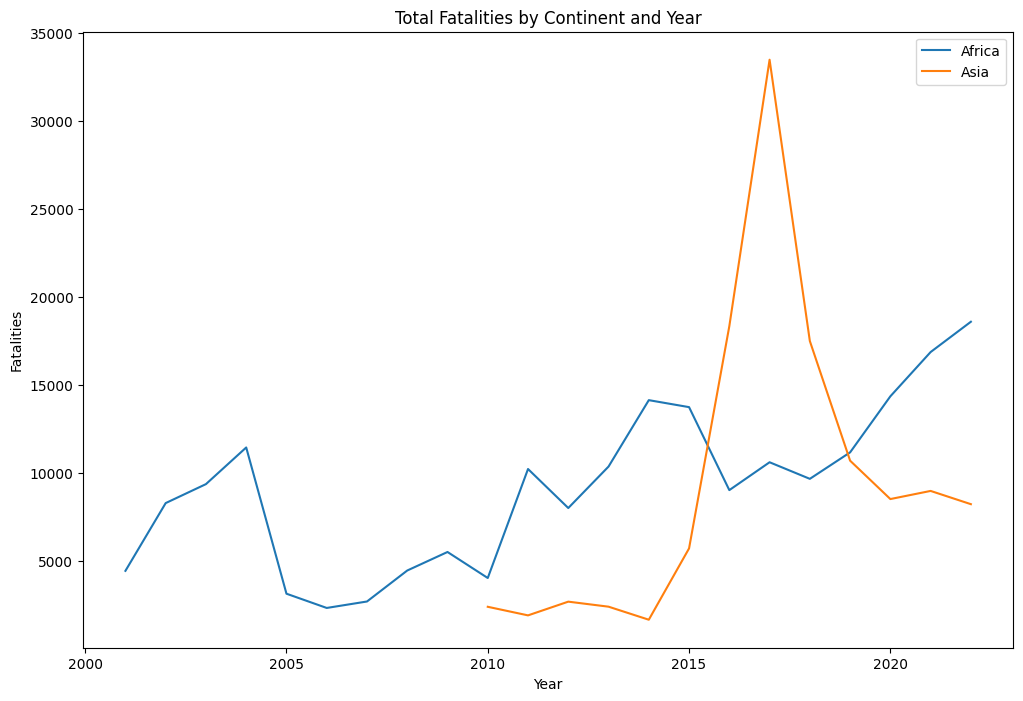

In [49]:
import matplotlib.pyplot as plt

# Aggregate data by region and country, and sort in descending order
region_data = data.groupby(['continent', 'country', 'year'])['fatalities'].sum().reset_index().sort_values('fatalities', ascending=False)

# Remove rows where fatalities <25 as civil unrest is considered when fatalities in a given year is more than 25
region_data = region_data[region_data.fatalities > 25]

# Group data by continent and year, and calculate the sum of fatalities
continent_year_data = region_data.groupby(['continent', 'year'])['fatalities'].sum().reset_index()

# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Loop through each continent and plot a line graph for the fatalities over years
for continent in continent_year_data['continent'].unique():
    continent_data = continent_year_data[continent_year_data['continent'] == continent]
    ax.plot(continent_data['year'], continent_data['fatalities'], label=continent)

# Set plot title, x-axis label, and y-axis label
ax.set_title("Total Fatalities by Continent and Year")
ax.set_xlabel("Year")
ax.set_ylabel("Fatalities")

# Add a legend
ax.legend()

# Show the plot
plt.show()


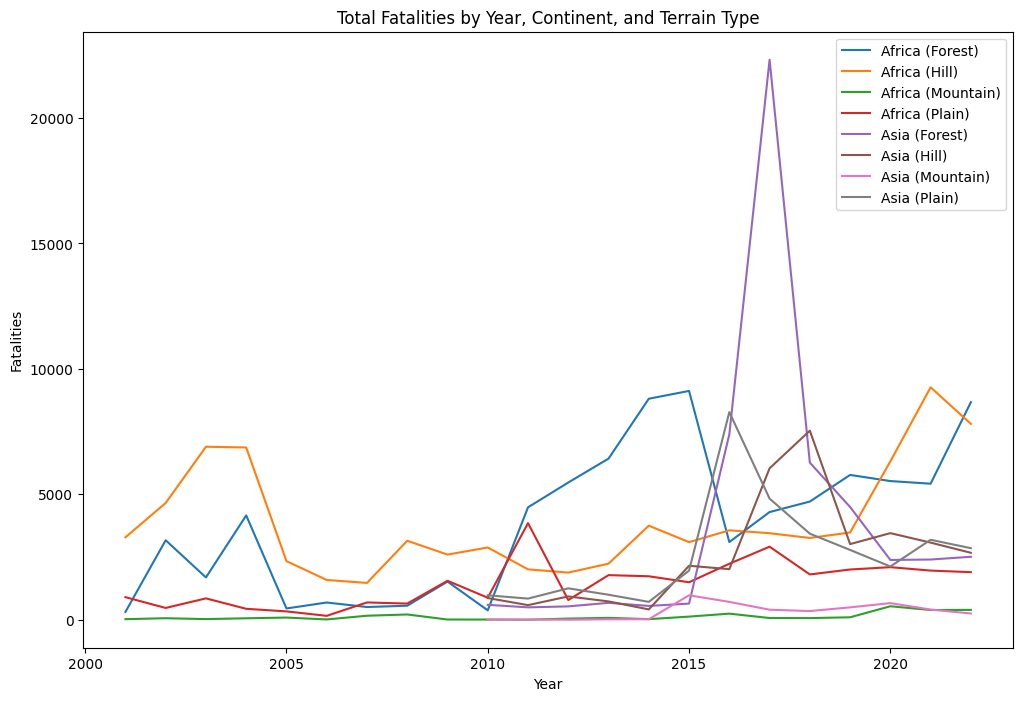

In [50]:
# Group data by continent, year, and terrain_type, and calculate the sum of fatalities
continent_year_terrain_data = data.groupby(['continent', 'year', 'terrain_type'])['fatalities'].sum().reset_index()

# Filter data for specified terrain types
terrain_types = ['Plain', 'Forest', 'Hill', 'Mountain']
continent_year_terrain_data = continent_year_terrain_data[continent_year_terrain_data['terrain_type'].isin(terrain_types)]

# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Loop through each continent and terrain_type and plot a line graph for the fatalities over years
for continent in continent_year_terrain_data['continent'].unique():
    for terrain_type in continent_year_terrain_data['terrain_type'].unique():
        continent_terrain_data = continent_year_terrain_data[(continent_year_terrain_data['continent'] == continent) &
                                                             (continent_year_terrain_data['terrain_type'] == terrain_type)]
        ax.plot(continent_terrain_data['year'], continent_terrain_data['fatalities'],
                label="{} ({})".format(continent, terrain_type))

# Set plot title, x-axis label, and y-axis label
ax.set_title("Total Fatalities by Year, Continent, and Terrain Type")
ax.set_xlabel("Year")
ax.set_ylabel("Fatalities")

# Add a legend
ax.legend()

# Show the plot
plt.show()


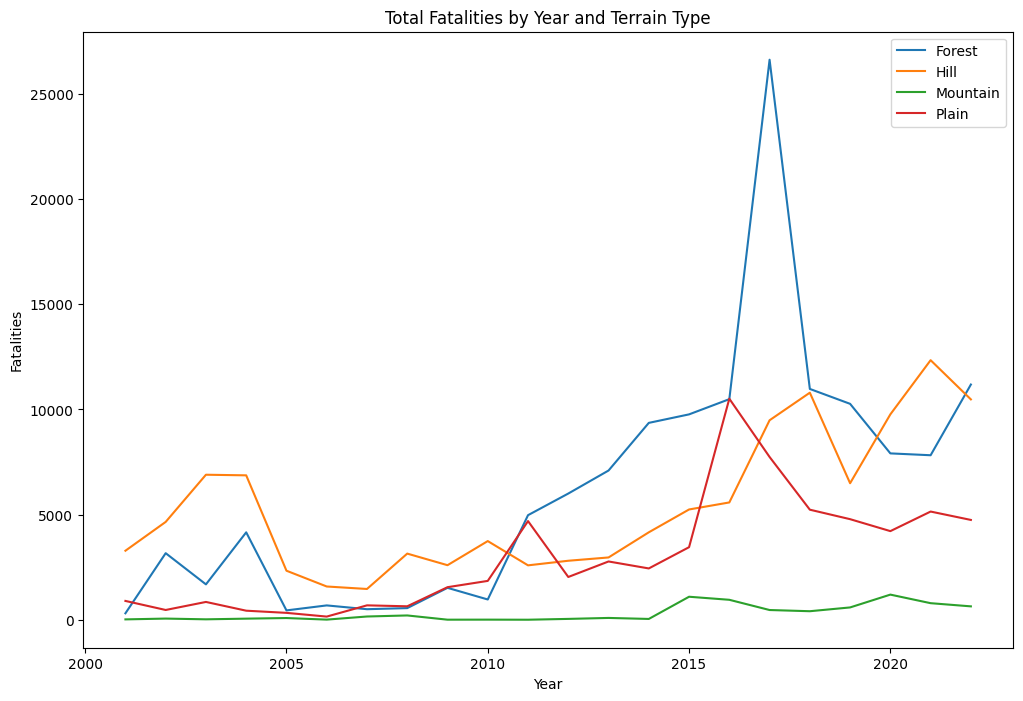

In [51]:
# Group data by year and terrain_type, and calculate the sum of fatalities
year_terrain_data = data.groupby(['year', 'terrain_type'])['fatalities'].sum().reset_index()

# Filter data for specified terrain types
terrain_types = ['Plain', 'Forest', 'Hill', 'Mountain']
year_terrain_data = year_terrain_data[year_terrain_data['terrain_type'].isin(terrain_types)]

# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Loop through each terrain_type and plot a line graph for the fatalities over years
for terrain_type in year_terrain_data['terrain_type'].unique():
    terrain_data = year_terrain_data[year_terrain_data['terrain_type'] == terrain_type]
    ax.plot(terrain_data['year'], terrain_data['fatalities'],
            label="{}".format(terrain_type))

# Set plot title, x-axis label, and y-axis label
ax.set_title("Total Fatalities by Year and Terrain Type")
ax.set_xlabel("Year")
ax.set_ylabel("Fatalities")

# Add a legend
ax.legend()

# Show the plot
plt.show()


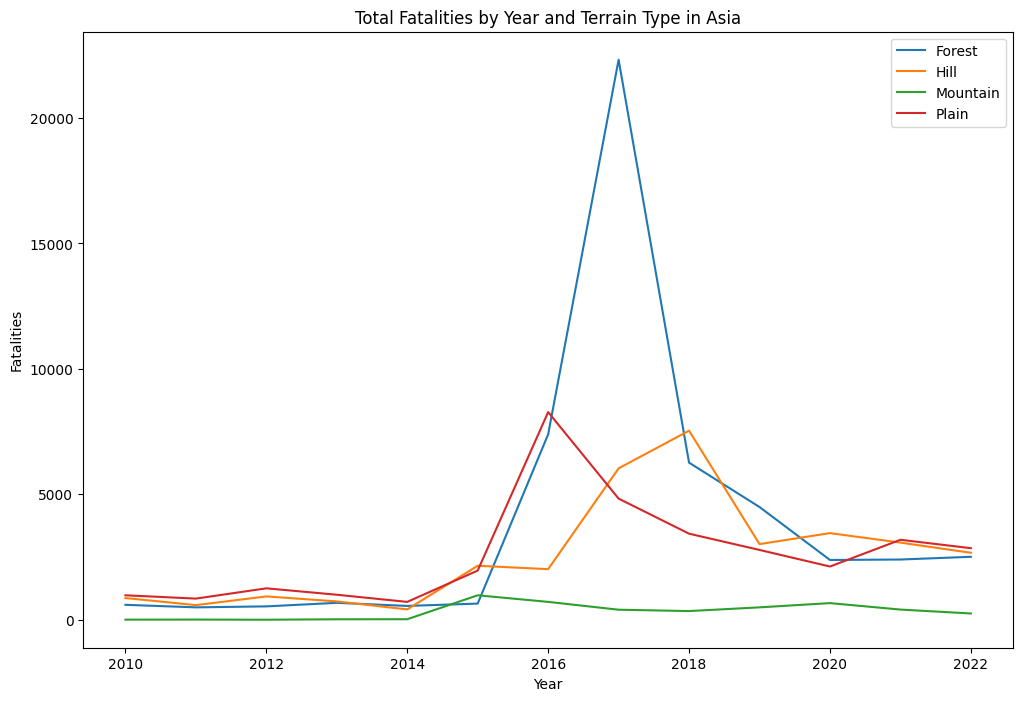

In [52]:
# Filter data for continent Asia
continent_data = data[data['continent'] == 'Asia']

# Group data by year, terrain_type, and calculate the sum of fatalities
year_terrain_data = continent_data.groupby(['year', 'terrain_type'])['fatalities'].sum().reset_index()

# Filter data for specified terrain types
terrain_types = ['Plain', 'Forest', 'Hill', 'Mountain']
year_terrain_data = year_terrain_data[year_terrain_data['terrain_type'].isin(terrain_types)]

# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Loop through each terrain_type and plot a line graph for the fatalities over years
for terrain_type in year_terrain_data['terrain_type'].unique():
    terrain_data = year_terrain_data[year_terrain_data['terrain_type'] == terrain_type]
    ax.plot(terrain_data['year'], terrain_data['fatalities'],
            label="{}".format(terrain_type))

# Set plot title, x-axis label, and y-axis label
ax.set_title("Total Fatalities by Year and Terrain Type in Asia")
ax.set_xlabel("Year")
ax.set_ylabel("Fatalities")

# Add a legend
ax.legend()

# Show the plot
plt.show()


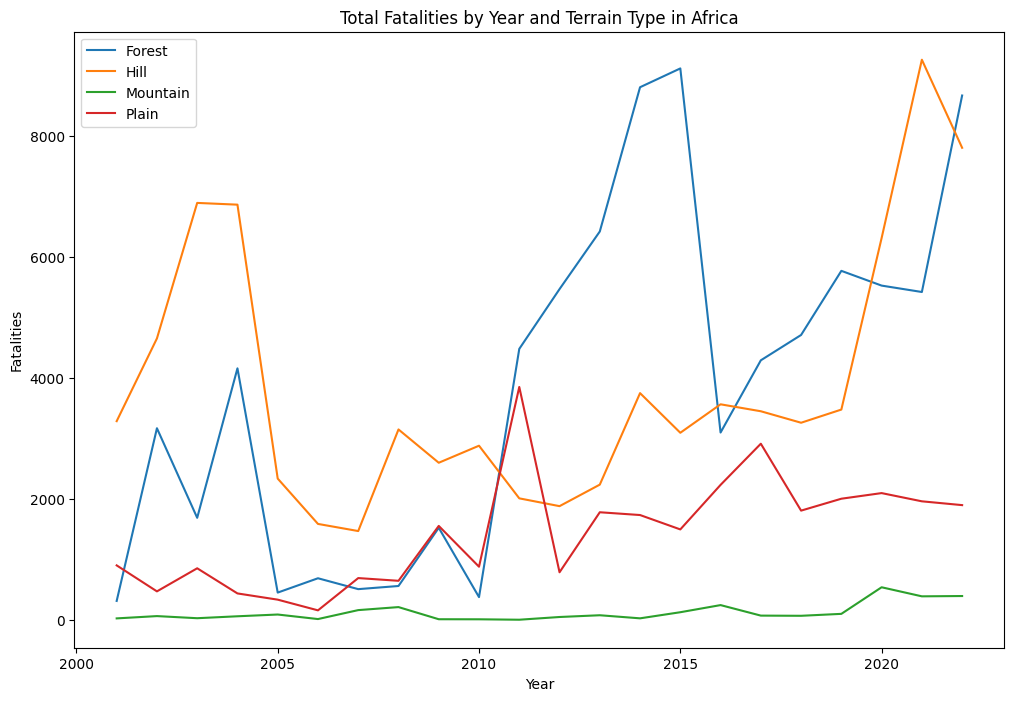

In [53]:
# Filter data for continent Asia
continent_data = data[data['continent'] == 'Africa']

# Group data by year, terrain_type, and calculate the sum of fatalities
year_terrain_data = continent_data.groupby(['year', 'terrain_type'])['fatalities'].sum().reset_index()

# Filter data for specified terrain types
terrain_types = ['Plain', 'Forest', 'Hill', 'Mountain']
year_terrain_data = year_terrain_data[year_terrain_data['terrain_type'].isin(terrain_types)]

# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Loop through each terrain_type and plot a line graph for the fatalities over years
for terrain_type in year_terrain_data['terrain_type'].unique():
    terrain_data = year_terrain_data[year_terrain_data['terrain_type'] == terrain_type]
    ax.plot(terrain_data['year'], terrain_data['fatalities'],
            label="{}".format(terrain_type))

# Set plot title, x-axis label, and y-axis label
ax.set_title("Total Fatalities by Year and Terrain Type in Africa")
ax.set_xlabel("Year")
ax.set_ylabel("Fatalities")

# Add a legend
ax.legend()

# Show the plot
plt.show()


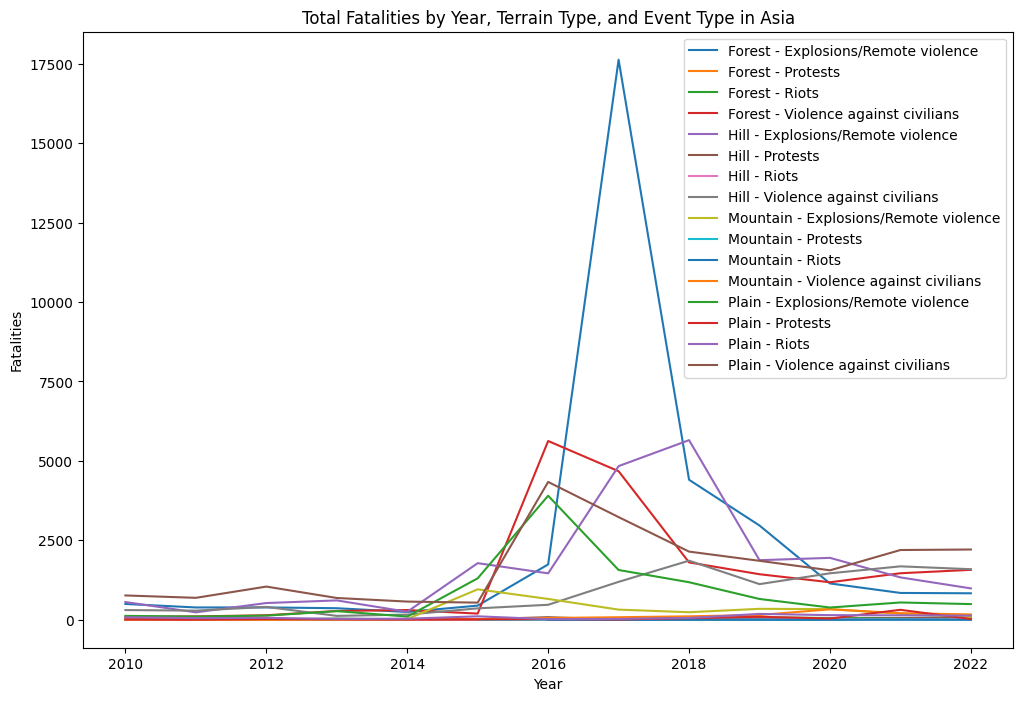

In [54]:
# Filter data for continent Asia
continent_data = data[data['continent'] == 'Asia']

# Group data by year, terrain_type, event_type and calculate the sum of fatalities
year_terrain_event_data = continent_data.groupby(['year', 'terrain_type', 'event_type'])['fatalities'].sum().reset_index()

# Filter data for specified terrain types
terrain_types = ['Plain', 'Forest', 'Hill', 'Mountain']
year_terrain_event_data = year_terrain_event_data[year_terrain_event_data['terrain_type'].isin(terrain_types)]

# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Loop through each terrain_type and event_type combination and plot a line graph for the fatalities over years
for terrain_type in year_terrain_event_data['terrain_type'].unique():
    for event_type in year_terrain_event_data['event_type'].unique():
        terrain_event_data = year_terrain_event_data[(year_terrain_event_data['terrain_type'] == terrain_type) &
                                                     (year_terrain_event_data['event_type'] == event_type)]
        ax.plot(terrain_event_data['year'], terrain_event_data['fatalities'],
                label="{} - {}".format(terrain_type, event_type))

# Set plot title, x-axis label, and y-axis label
ax.set_title("Total Fatalities by Year, Terrain Type, and Event Type in Asia")
ax.set_xlabel("Year")
ax.set_ylabel("Fatalities")

# Add a legend
ax.legend()

# Show the plot
plt.show()


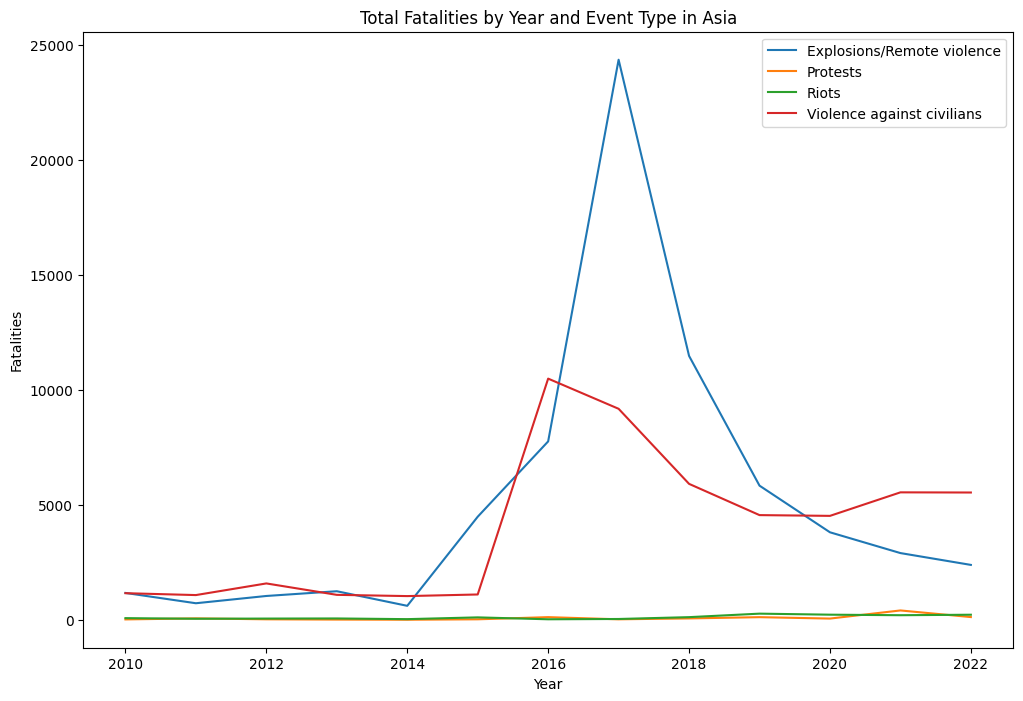

In [55]:
# Filter data for continent Asia
continent_data = data[data['continent'] == 'Asia']

# Group data by year, event_type, and calculate the sum of fatalities
year_event_data = continent_data.groupby(['year', 'event_type'])['fatalities'].sum().reset_index()

# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Loop through each event_type and plot a line graph for the fatalities over years
for event_type in year_event_data['event_type'].unique():
    event_data = year_event_data[year_event_data['event_type'] == event_type]
    ax.plot(event_data['year'], event_data['fatalities'], label=event_type)

# Set plot title, x-axis label, and y-axis label
ax.set_title("Total Fatalities by Year and Event Type in Asia")
ax.set_xlabel("Year")
ax.set_ylabel("Fatalities")

# Add a legend
ax.legend()

# Show the plot
plt.show()


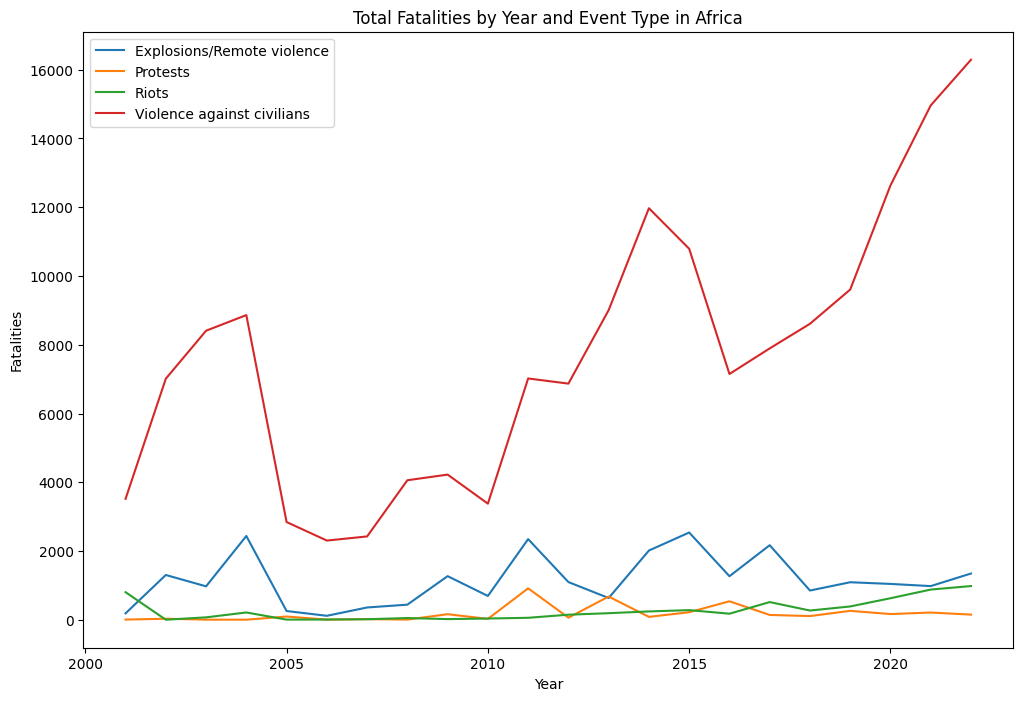

In [56]:
# Filter data for continent Africa
continent_data = data[data['continent'] == 'Africa']

# Group data by year, event_type, and calculate the sum of fatalities
year_event_data = continent_data.groupby(['year', 'event_type'])['fatalities'].sum().reset_index()

# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Loop through each event_type and plot a line graph for the fatalities over years
for event_type in year_event_data['event_type'].unique():
    event_data = year_event_data[year_event_data['event_type'] == event_type]
    ax.plot(event_data['year'], event_data['fatalities'], label=event_type)

# Set plot title, x-axis label, and y-axis label
ax.set_title("Total Fatalities by Year and Event Type in Africa")
ax.set_xlabel("Year")
ax.set_ylabel("Fatalities")

# Add a legend
ax.legend()

# Show the plot
plt.show()


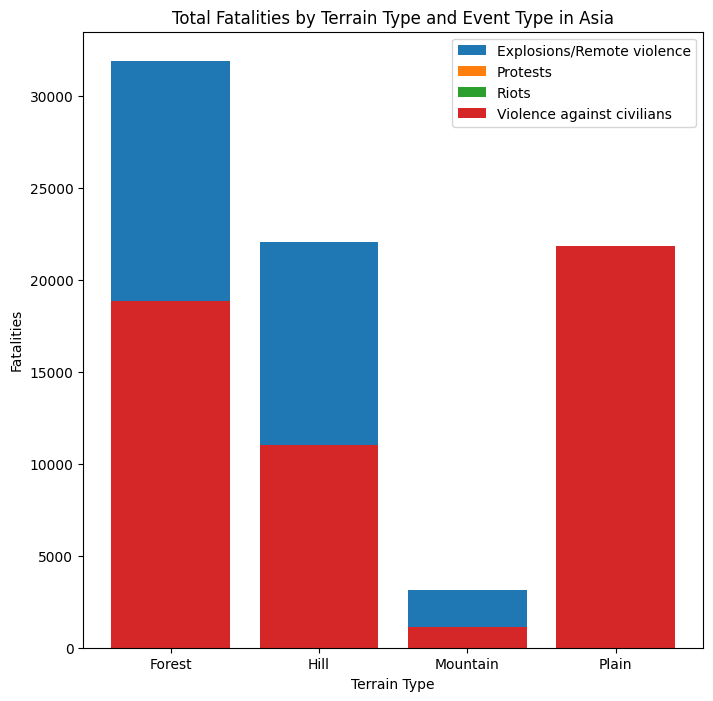

In [57]:
# Filter data for continent Asia
continent_data = data[data['continent'] == 'Asia']

# Group data by terrain_type, event_type, and calculate the sum of fatalities
terrain_event_data = continent_data.groupby(['terrain_type', 'event_type'])['fatalities'].sum().reset_index()

# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 8))

# Loop through each event_type and plot a bar graph for the total fatalities by terrain_type
for event_type in terrain_event_data['event_type'].unique():
    event_data = terrain_event_data[terrain_event_data['event_type'] == event_type]
    ax.bar(event_data['terrain_type'], event_data['fatalities'], label=event_type)

# Set plot title, x-axis label, and y-axis label
ax.set_title("Total Fatalities by Terrain Type and Event Type in Asia")
ax.set_xlabel("Terrain Type")
ax.set_ylabel("Fatalities")

# Add a legend
ax.legend()

# Show the plot
plt.show()


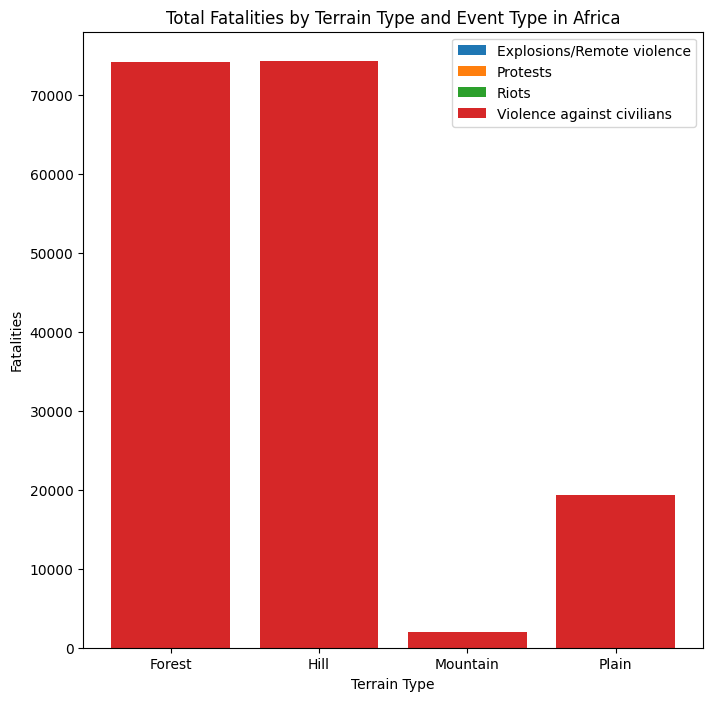

In [58]:
# Filter data for continent Africa
continent_data = data[data['continent'] == 'Africa']

# Group data by terrain_type, event_type, and calculate the sum of fatalities
terrain_event_data = continent_data.groupby(['terrain_type', 'event_type'])['fatalities'].sum().reset_index()

# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 8))

# Loop through each event_type and plot a bar graph for the total fatalities by terrain_type
for event_type in terrain_event_data['event_type'].unique():
    event_data = terrain_event_data[terrain_event_data['event_type'] == event_type]
    ax.bar(event_data['terrain_type'], event_data['fatalities'], label=event_type)

# Set plot title, x-axis label, and y-axis label
ax.set_title("Total Fatalities by Terrain Type and Event Type in Africa")
ax.set_xlabel("Terrain Type")
ax.set_ylabel("Fatalities")

# Add a legend
ax.legend()

# Show the plot
plt.show()


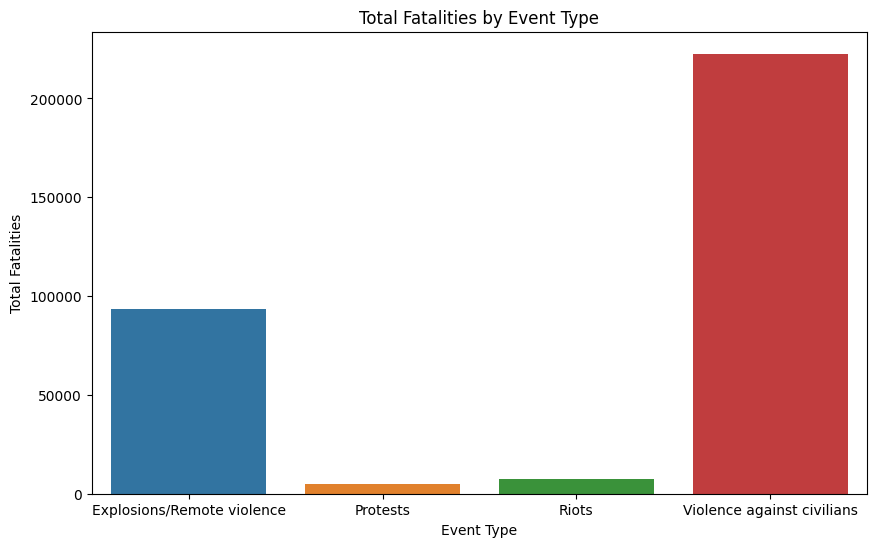

In [59]:
# Group data by event_type and calculate the sum of fatalities
event_fatality_data = data.groupby(['event_type'])['fatalities'].sum().reset_index()

# Create a bar plot showing the total number of fatalities for each event_type
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x='event_type', y='fatalities', data=event_fatality_data, ax=ax)
ax.set_xlabel('Event Type')
ax.set_ylabel('Total Fatalities')
ax.set_title('Total Fatalities by Event Type')
#plt.xticks(rotation=90)
plt.show()


In [60]:
# Group data by terrain_type, event_type, and year, and calculate the sum of fatalities
terrain_event_year_fatality_data = data.groupby(['terrain_type', 'event_type', 'year'])['fatalities'].sum().reset_index()

# Filter the data to only include rows where fatalities > 1000
terrain_event_year_fatality_data = terrain_event_year_fatality_data[terrain_event_year_fatality_data['fatalities'] > 1000]

# Print the descriptive statistics for the total number of fatalities
print(terrain_event_year_fatality_data.groupby(['terrain_type', 'event_type'])['fatalities'].describe())


                                         count         mean          std  \
terrain_type event_type                                                    
Forest       Explosions/Remote violence   10.0  3795.600000  5314.556430   
             Violence against civilians   16.0  5643.187500  2435.565868   
Hill         Explosions/Remote violence    9.0  2670.666667  1574.805305   
             Violence against civilians   22.0  3874.636364  2257.142769   
Plain        Explosions/Remote violence    7.0  2063.285714  1103.287468   
             Violence against civilians   13.0  2899.461538  1453.602743   

                                            min     25%     50%      75%  \
terrain_type event_type                                                    
Forest       Explosions/Remote violence  1091.0  1454.0  1892.5  3055.75   
             Violence against civilians  1477.0  4085.0  6307.0  7459.25   
Hill         Explosions/Remote violence  1351.0  1775.0  2031.0  2190.00   
           

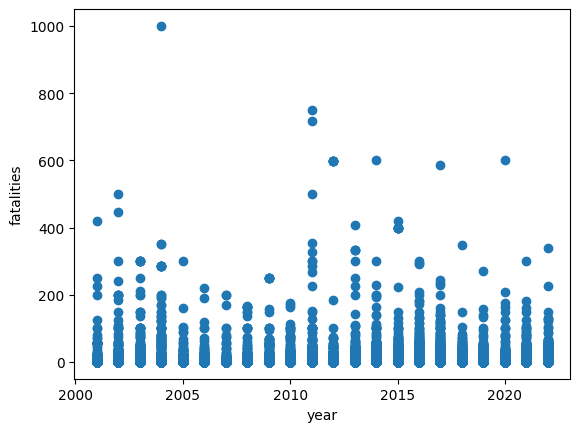

In [61]:
plt.xlabel("year")
plt.ylabel("fatalities")
plt.scatter(data.year, data.fatalities)

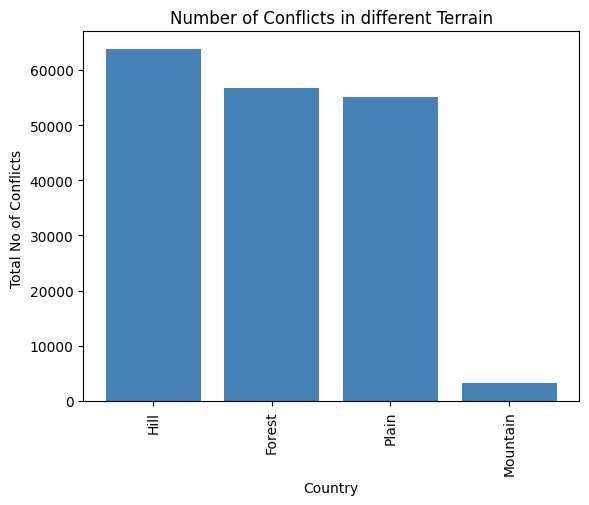

In [62]:
# Compute the counts of conflicts by country
counts = data['terrain_type'].value_counts().reset_index()
counts.columns = ['terrain_type', 'conflicts']

# Sort the data in descending order of number of conflicts and select the top 10
counts_data = counts.sort_values('conflicts', ascending=False).head(10)

# Create the bar plot
plt.bar(x=counts_data['terrain_type'], height=counts_data['conflicts'], color='steelblue')
plt.xticks(rotation=90, ha='center')
plt.xlabel('Country')
plt.ylabel('Total No of Conflicts ')
plt.title('Number of Conflicts in different Terrain')
plt.show()


In [63]:
data1.columns

Index(['iso', 'event_id_cnty', 'event_id_no_cnty', 'event_date', 'year',
       'time_precision', 'sub_event_type', 'actor1', 'assoc_actor_1', 'inter1',
       'actor2', 'assoc_actor_2', 'inter2', 'interaction', 'country', 'admin1',
       'admin2', 'admin3', 'location', 'latitude', 'longitude',
       'geo_precision', 'source', 'source_scale', 'notes', 'fatalities',
       'timestamp', 'elevation', 'continent', 'conflict',
       'event_type_Explosions', 'event_type_Protests', 'event_type_Riots',
       'event_type_Violence', 'terrain_type_Forest', 'terrain_type_Hill',
       'terrain_type_Mountain', 'terrain_type_Plain',
       'region_Caucasus and Central Asia', 'region_East Asia',
       'region_Eastern Africa', 'region_Middle Africa', 'region_Middle East',
       'region_Northern Africa', 'region_South Asia', 'region_Southeast Asia',
       'region_Southern Africa', 'region_Western Africa'],
      dtype='object')

# **Implementing Linear Regression on the Data1**

In [64]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Prepare the data for regression
X = data1[['event_type_Explosions', 'event_type_Protests', 'event_type_Riots', 'event_type_Violence',
           'terrain_type_Forest', 'terrain_type_Hill', 'terrain_type_Mountain', 'terrain_type_Plain',
            'year','region_Caucasus and Central Asia', 'region_East Asia',
       'region_Eastern Africa', 'region_Middle Africa', 'region_Middle East',
       'region_Northern Africa', 'region_South Asia', 'region_Southeast Asia',
       'region_Southern Africa', 'region_Western Africa']]  # Features
y = data1['conflict']  # Target variable

# Fit the linear regression model
regression_model = LinearRegression()
regression_model.fit(X, y)

# Print the coefficients (slopes) of the features
print('Coefficients (Slopes):')
for i, feature in enumerate(X.columns):
    print(f'{feature}: {regression_model.coef_[i]}')

# Print the intercept (y-intercept) of the model
print('Intercept (Y-Intercept):', regression_model.intercept_)

# Predict the fatalities using the trained model
y_pred = regression_model.predict(X)

Coefficients (Slopes):
event_type_Explosions: -98217391054.11841
event_type_Protests: -98217391054.35023
event_type_Riots: -98217391054.40425
event_type_Violence: -98217391054.16327
terrain_type_Forest: -382953859189.92163
terrain_type_Hill: -382953859189.9653
terrain_type_Mountain: -382953859189.9245
terrain_type_Plain: -382953859189.9195
year: -0.00042560167798235174
region_Caucasus and Central Asia: -126413571075.15161
region_East Asia: -126413571075.62984
region_Eastern Africa: -126413571075.08197
region_Middle Africa: -126413571075.09537
region_Middle East: -126413571075.14005
region_Northern Africa: -126413571075.173
region_South Asia: -126413571075.18408
region_Southeast Asia: -126413571074.98885
region_Southern Africa: -126413571075.33498
region_Western Africa: -126413571075.10298
Intercept (Y-Intercept): 607584821320.6215


In [65]:
# Print the predicted values
print('Predicted Fatalities:', y_pred)

Predicted Fatalities: [0.52770996 0.48291016 0.48291016 ... 0.05639648 0.05639648 0.05639648]


# **Logistic Regression**

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Prepare the data for logistic regression
# X = data1[['event_type_Explosions', 'event_type_Protests', 'event_type_Riots', 'event_type_Violence',
#            'terrain_type_Forest', 'terrain_type_Hill', 'terrain_type_Mountain', 'terrain_type_Plain',
#            'continent_Africa', 'continent_Asia']]  # Features
# y = data1['conflict'] 
# # Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the logistic regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Predict on the testing set
y_pred = logreg_model.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)

In [67]:
print('Accuracy:', accuracy)

Accuracy: 0.5960135305135444


# **Predicting the likelihood of conflict using Logistic Regression**

In [68]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Prepare the data for logistic regression
# X = data1[['event_type_Explosions', 'event_type_Protests', 'event_type_Riots', 'event_type_Violence',
#            'terrain_type_Forest', 'terrain_type_Hill', 'terrain_type_Mountain', 'terrain_type_Plain',
#            'continent_Africa', 'continent_Asia', 'year']]  # Features
# y = data1['fatalities']   # Target variable (binary: True if fatalities > 1000, False otherwise)

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
logreg_model = LogisticRegression()

# Fit the logistic regression model
logreg_model.fit(X_train, y_train)

# Predict probabilities on the testing set
y_pred_proba = logreg_model.predict_proba(X_test)[:, 1]

# Predict binary outcomes on the testing set
y_pred = y_pred_proba > 0.5

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Print classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.5960135305135444
              precision    recall  f1-score   support

           0       0.64      0.37      0.47     17209
           1       0.58      0.80      0.67     18562

    accuracy                           0.60     35771
   macro avg       0.61      0.59      0.57     35771
weighted avg       0.61      0.60      0.58     35771



# **After Hyper-Parameter Tunning**

In [69]:
# import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Prepare the data for logistic regression
# X = data1[['terrain_type_Forest', 'terrain_type_Hill', 'terrain_type_Mountain', 'terrain_type_Plain',
#            'continent_Africa', 'continent_Asia','fatalities', 'year']]  # Features
# y = data1['event_type']   # Target variable (binary: True if fatalities > 1000, False otherwise)

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameter values to be tuned
param_grid = {'penalty': ['l1', 'l2', 'elasticnet'],
              'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Create a logistic regression model
logreg_model = LogisticRegression()

# Perform grid search with cross-validation
grid_search = GridSearchCV(logreg_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best hyperparameter values and corresponding accuracy score
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_
print('Best Hyperparameters:', best_params)
print('Best Accuracy:', best_accuracy)

# Fit the logistic regression model with best hyperparameter values
best_logreg_model = LogisticRegression(**best_params)
best_logreg_model.fit(X_train, y_train)

# Predict on the testing set
y_pred = best_logreg_model.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best Hyperparameters: {'C': 1, 'penalty': 'l2'}
Best Accuracy: 0.5952753704221415


In [70]:
print('Accuracy:', accuracy)

Accuracy: 0.5960135305135444


#**Using Random Forest**

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create a random forest classifier
rf_model = RandomForestClassifier()

# Fit the random forest classifier
rf_model.fit(X_train, y_train)

# Predict on the testing set
y_pred = rf_model.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)


In [72]:
print('Accuracy:', accuracy)

Accuracy: 0.6527634117022169


#**After HyperParmeter Tunning for Random Forest**

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

# Define the hyperparameter grid to search
param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [None, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

# Create a Random Forest classifier
rf_model = RandomForestClassifier()

# Perform grid search cross-validation
grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print('Best Hyperparameters:', best_params)

# Create a Random Forest classifier with the best hyperparameters
best_rf_model = RandomForestClassifier(**best_params)

# Fit the Random Forest classifier with the best hyperparameters
best_rf_model.fit(X_train, y_train)

# Predict on the testing set
y_pred = best_rf_model.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy: 0.653210701406167


#**Applying Support Vector Machine SVM**

In [74]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create an SVM classifier
svm_model = SVC()

# Fit the SVM classifier
svm_model.fit(X_train, y_train)

# Predict on the testing set
y_pred = svm_model.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.5189119677951413


#**hyperparameters for SVM**

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Define the hyperparameter grid to search
param_grid = {'C': [0.1, 1, 10, 100],
              'kernel': ['linear', 'rbf', 'sigmoid'],
              'gamma': ['scale', 'auto'] + list(range(1, 11))}

# Create an SVM classifier
svm_model = SVC()

# Perform grid search cross-validation
grid_search = GridSearchCV(svm_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print('Best Hyperparameters:', best_params)

# Create an SVM classifier with the best hyperparameters
best_svm_model = SVC(**best_params)

# Fit the SVM classifier with the best hyperparameters
best_svm_model.fit(X_train, y_train)

# Predict on the testing set
y_pred = best_svm_model.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# **Using Xgboost**

In [14]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Prepare the data for XGBoost
X = data1[['event_type_Explosions', 'event_type_Protests', 'event_type_Riots', 'event_type_Violence',
           'terrain_type_Forest', 'terrain_type_Hill', 'terrain_type_Mountain', 'terrain_type_Plain',
           'region_Caucasus and Central Asia', 'region_East Asia',
           'region_Eastern Africa', 'region_Middle Africa', 'region_Middle East',
           'region_Northern Africa', 'region_South Asia', 'region_Southeast Asia',
           'region_Southern Africa', 'region_Western Africa', 'year']]  # Features
y = data1['conflict']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an XGBoost model and fit it on the training data
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

# Evaluate the model on the testing data
accuracy = xgb_model.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.6521544654838228
